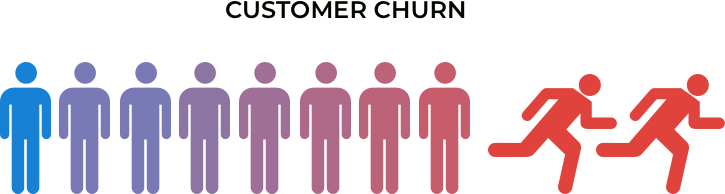




<br><br><br>

<div style="color:white;display:fill;border-radius:5px;background-color:#008B8B;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:30px;letter-spacing:0.5px;margin:0"><b>1 |</b> Business Objective</p></div>
<br>

<h3>The task is to analyze this dataset to gain insights about why customers leave the company and to build predictive models to predict whether a customer will churn or not.</h3>

## Data field description

* customerID - a unique ID for each customer
* gender - Whether the customer is male or female
* SeniorCitizen - Whether the cutsomer is senior citizen or not
* Partner - Whether the customer has a partner or not
* Dependents - Whether the customer has dependents or not
* tenure - Number of months the customer has stayed with the company
* PhoneService - Whether the customer has a phone service or not
* MultipleLines - Whether the customer has multiple lines or not
* InternetService - Customer’s internet service provider 
* OnlineSecurity - Whether the customer has online security or not
* OnlineBackup - Whether the customer has online backup or not
* DeviceProtection - Whether the customer has device protection or not
* TechSupport - Whether the customer has tech support or not
* StreamingTV - Whether the customer has streaming TV or not
* StreamingMovies - Whether the customer has streaming movies or not
* Contract - The contract term of the customer (Month-to-month, One year, Two year)
* PaperlessBiling - Whether the customer has paperless billing or not
* PaymentMethod - The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic)
* MonthlyCharges - The amount charged to the customer monthly
* TotalCharges - The total amount charged to the customer
* Churn - Whether the customer churned or not

# Importing Python Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import plot, iplot, init_notebook_mode
init_notebook_mode(connected=True)
np.random.seed(101)

import math
import warnings
warnings.filterwarnings("ignore")
pd.options.display.max_columns = 100

from sklearn.model_selection import train_test_split, RandomizedSearchCV, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
import tensorflow as tf
from tensorflow import keras

In [2]:
#Uploading the dataset
df = pd.read_csv("WA_Fn-UseC_-Telco-Customer-Churn.csv")

<div style="color:white;display:fill;border-radius:5px;background-color:#8B008B;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:30px;letter-spacing:0.5px;margin:0"><b>2 |</b> Data Cleaning</p></div>

In [3]:
df.shape

(7043, 21)

In [4]:
df.head(3)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Seems like there's no null values, but the TotalCharges columns should be numeric type

In [6]:
#converting the "TotalCharges" column data type to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'],errors='coerce')

In [7]:
#Checking for null values
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

To deal with missing values we have three approaches:-
* Drop the columns (if we have a lot of missing values)
* Fill the missing values with the mean or median (if we have a relatively low number of missing values)
* Drop the corresponding rows (if we have low number of missing value)

In this case gonna drop the corresponding records since we have only 11 missing values out of 7043 records.

In [8]:
#Dropping the records with missing values
df.dropna(inplace = True)
df.isnull().sum().any()

False

In [9]:
#Checking if the "customerID" column have duplicate values
df['customerID'].is_unique

True

In [10]:
#dropping the "customerID" columns
df.drop('customerID',axis=1,inplace=True)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


Now we're gonna split the DataFrame into two (numeric and categorical) to clean each one separately.

In [12]:
#Creating two dataframes for both numeric and categorical features
df_num = df[['tenure','MonthlyCharges','TotalCharges']]
df_cats = df.drop(['tenure','MonthlyCharges','TotalCharges'],axis=1)

### Numeric DataFrame

In [13]:
df_num.describe().T

,count,mean,std,min,25%,50%,75%,max
tenure,7032.0,32.421786,24.545260,1.00,9.0000,29.000,55.0000,72.00
MonthlyCharges,7032.0,64.798208,30.085974,18.25,35.5875,70.350,89.8625,118.75
TotalCharges,7032.0,2283.300441,2266.771362,18.80,401.4500,1397.475,3794.7375,8684.80


The TotalCharges columns seems to have outliers since the maximum values is too far away from the third quantile, so lets check if that's true.

In [14]:
#Calculating the first and third quantile of the "TotalCharges" columns
q1 = df_num['TotalCharges'].quantile(0.25)
q3 = df_num['TotalCharges'].quantile(0.75)

#Calculating the Interquantile range (IQR)
IQR = q3 - q1

#Calculating the lower and upper bound
lower_bound = q1 - (IQR * 1.5)
upper_bound = q3 + (IQR * 1.5)

#Checking if the values of the column lies between the lower and upper bound
df_num['TotalCharges'].min() > lower_bound and df_num['TotalCharges'].max() < upper_bound

True

Great! we have no outliers.

Now we're gonna scale the values to the range of (0,1)

In [15]:
#Scaling the dataframe
scaler = MinMaxScaler()
Scaled = scaler.fit_transform(df_num)

#Converting the scaled data back to the dataframe form
df_nums = pd.DataFrame(Scaled,columns= df_num.columns,index=df_num.index)

In [16]:
df_nums.head()

,tenure,MonthlyCharges,TotalCharges
0,0.000000,0.115423,0.001275
1,0.464789,0.385075,0.215867
2,0.014085,0.354229,0.010310
3,0.619718,0.239303,0.210241
4,0.014085,0.521891,0.015330


### Categorical DataFrame

In [17]:
#Looking at the unique values in each column
for cat in df_cats.columns:
    print("{}: {}".format(cat,list(df[cat].unique())))

gender: ['Female', 'Male']
SeniorCitizen: [0, 1]
Partner: ['Yes', 'No']
Dependents: ['No', 'Yes']
PhoneService: ['No', 'Yes']
MultipleLines: ['No phone service', 'No', 'Yes']
InternetService: ['DSL', 'Fiber optic', 'No']
OnlineSecurity: ['No', 'Yes', 'No internet service']
OnlineBackup: ['Yes', 'No', 'No internet service']
DeviceProtection: ['No', 'Yes', 'No internet service']
TechSupport: ['No', 'Yes', 'No internet service']
StreamingTV: ['No', 'Yes', 'No internet service']
StreamingMovies: ['No', 'Yes', 'No internet service']
Contract: ['Month-to-month', 'One year', 'Two year']
PaperlessBilling: ['Yes', 'No']
PaymentMethod: ['Electronic check', 'Mailed check', 'Bank transfer (automatic)', 'Credit card (automatic)']
Churn: ['No', 'Yes']


So we have two different types of categorical data, multivalues columns ("PaymentMethod","InternetService","Contract") and the rest are boolean columns (if we ignored the "No internet service" values since the add no new information).

In [18]:
#Creating two list of multivalues and boolean columns
bool_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
        'TechSupport', 'StreamingTV', 'StreamingMovies', 'PaperlessBilling', 'Churn']
multi_cols = ['InternetService','PaymentMethod', 'Contract']

In [19]:
#Converting The "Yes" & "Male" values to 1 and "No" & "Female" values to 0
for i in bool_cols:
    if i !='SeniorCitizen':
        df_cats[i] = df_cats[i].apply(lambda x:1 if x == 'Yes' or x == 'Male' else 0)

In [20]:
df_cats.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,0,0,1,0,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,0
1,1,0,0,0,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,0
2,1,0,0,0,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,1


In [21]:
#Encoding the mutlivalues columns
df_dummies = pd.get_dummies(df[multi_cols])

#Dropping the multivalues columns from the categorical dataframe
df_cats.drop(multi_cols,axis=1,inplace=True)

In [22]:
df_dummies.head(3)

,InternetService_DSL,InternetService_Fiber optic,InternetService_No,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year
0,1,0,0,0,0,1,0,1,0,0
1,1,0,0,0,0,0,1,0,1,0
2,1,0,0,0,0,0,1,1,0,0


In [23]:
#Dropping the "InternetService_No" since it does not add any new information
df_dummies.drop('InternetService_No',axis=1,inplace=True)

In [24]:
#Putting all our cleand data in one dataframe
df_ = pd.concat([df_cats,df_dummies,df_nums],axis=1)

In [25]:
df_.head(3)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,PaperlessBilling,Churn,InternetService_DSL,InternetService_Fiber optic,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Contract_Month-to-month,Contract_One year,Contract_Two year,tenure,MonthlyCharges,TotalCharges
0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,1,0,0,0.000000,0.115423,0.001275
1,1,0,0,0,1,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0.464789,0.385075,0.215867
2,1,0,0,0,1,0,1,1,0,0,0,0,1,1,1,0,0,0,0,1,1,0,0,0.014085,0.354229,0.010310


Now that we have cleaned the data for the machine learning model, lets start exploring the original dataframe to find some insights

<div style="color:white;display:fill;border-radius:5px;background-color:#A0522D;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:30px;letter-spacing:0.5px;margin:0"><b>3 |</b> Exploratory Data Analysis (EDA)</p></div>

In [26]:
#Creating and correlation matrix to see what features are correlated with the churn rate
corr_matrix = df_.corr()['Churn'].sort_values(ascending=False)[1:]
px.defaults.template = "plotly_white"
fig = px.bar(corr_matrix,height=600,color_discrete_sequence=['#288ba8'])
fig.update_xaxes(tickangle=50)
fig.show()

Month-to-Month contract is positively high correlated with churn rate, while tenure and two-year contract is negatively correlated.

**The higher the duration of the contract or the number of months the customer has stayed at the company, The less likely that they will churn**

also not having an online security nor tech support could lead customers to churn

In [27]:
#Creating a pie chart to see the percentage of churn vs retained customer
values = df['Churn'].value_counts().tolist()
plot_data = [
    go.Pie(
        values=values,
        labels= ['Churn','Reatined'],
        pull=[0, 0.1]
    )
        ]
fig = go.Figure(data=plot_data)
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=['#2E86C1','#154360'], line=dict(color='#000000', width=1)))
fig.show()

We have 73.4% of the customers churned while 26.6% did not

In [28]:
#Creating a pie chart to compare between the percentage of males vs females in our dataset
values = df['gender'].value_counts().tolist()
plot_data = [
    go.Pie(
        values=values,
        labels=['Male','Female']
    )
        ]
fig = go.Figure(data=plot_data)
fig.update_traces(hoverinfo='label+percent', textfont_size=20,
                  marker=dict(colors=['#288ba8','#DE3163'], line=dict(color='#000000', width=1)))
fig.show()

Males and females are pretty eqaul in this dataset with a slighly more males than females (1%)

In [29]:
#Creating a bar plot function

#Converting the churn columns in the original dataframe to 0s and 1s so we can apply aggregation functions to it
df['Churn'] = df['Churn'].apply(lambda x:1 if x == "Yes" else 0)
def bar_plot(X):
    bins = len(df[X].unique())
    colors = ['#DE3163', '#288ba8','#884EA0','#F4D03F']
    df_plot = df.groupby(X).Churn.mean().reset_index()
    plot_data = [
        go.Bar(
            x=df_plot[X],
            y=df_plot['Churn'],
            width = [0.5] * bins,
            marker=dict(
            color=colors[:bins])
        )
    ]
    plot_layout = go.Layout(
            xaxis={"type": "category"},
            yaxis={"title": "Churn Rate"},
            title=X.capitalize(),
            plot_bgcolor  = '#FFFFFF',
        )
    fig = go.Figure(data=plot_data, layout=plot_layout)
    fig.show()

## Gender

In [30]:
bar_plot('gender')

Females customers tends to churn by 7.5% than males

## Internet Service

In [31]:
bar_plot("InternetService")

Customers with fiber optics are more likely to churn, while customers with no internet services are the most likely to stay

## Payment Mathods

In [32]:
bar_plot("PaymentMethod")

Automating the payment method makes the customers more likely to stay by approximately 20% more than electronic checks

## Senior Citizens

In [33]:
bar_plot("SeniorCitizen")

Senior citizens are more likely to churn by (18%) than younger citizens

## Tech Support

In [34]:
bar_plot("TechSupport")

Customers with no tech support are more likely to churn (by 26%) more than customers with tech support

## Contract

In [35]:
bar_plot("Contract")

Low contract duration tends to make customer churn

## Tenure

In [36]:
df['tenure'].describe()

count    7032.000000
mean       32.421786
std        24.545260
min         1.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64

In [37]:
#Splitting the "tenure" columns to three categories
df['tenure_bins'] = pd.cut(df['tenure'],bins=(0.,24,48,np.inf),labels=("low_tenure","med_tenure","high_tenure"))

Since the tenure columns have continous values, we're gonna cut it into three categoris (low, medium, high)

In [38]:
bar_plot('tenure_bins')

In [39]:
#Creating a scatter plot for tenure with churn rate
df_plot = df.groupby('tenure').Churn.mean().reset_index()
plot_data = [
    go.Scatter(x=df_plot['tenure'],
               y=df_plot['Churn'],
               mode='lines+markers',
               marker= dict(size= 7,
               line= dict(width=1),
               color= '#288ba8',
               opacity= 0.8
               ))
]

plot_layout = go.Layout(
    xaxis = {'title':'Tenure'},
    yaxis = {'title' : 'Churn Rate'},
    title = 'Churn rate by tenure',
    plot_bgcolor = '#FFFFFF'
    )
fig = go.Figure(data=plot_data,layout=plot_layout)
fig.show()

The lower the number of months the customers stays at the company, the more likely they will churn

## Monthly and Total Charges

In [40]:
#Creating a scatter plot function
def scatter_plot(X):
    df_plot = df.groupby(X).Churn.mean().reset_index()
    plot_data = [
        go.Scatter(x=df_plot[X],
                   y=df_plot['Churn'],
                   mode='markers',
                   marker= dict(size= 5,
                   color= '#288ba8',
                   opacity= 0.8
                   ))
    ]

    plot_layout = go.Layout(
        xaxis = {'title':X},
        yaxis = {'title' : 'Churn Rate'},
        title = 'Churn rate by {}'.format(X),
        plot_bgcolor = '#FFFFFF'
        )
    fig = go.Figure(data=plot_data,layout=plot_layout)
    fig.show()

In [41]:
scatter_plot('TotalCharges')

In [42]:
scatter_plot('MonthlyCharges')

It seems like there's no correlation between churn rate and both monthly & total charges.

let's see if the ratio between monthly and total charges could give us new information

In [43]:
#Creating a new feature by getting the ratio between Monthly over Total Charges
df['Monthly_per_total'] = df['MonthlyCharges'] / df['TotalCharges']

In [44]:
scatter_plot('Monthly_per_total')

Again, there's no trend between the ration between monthly over total charges and the churn rate

# Conclusion

* The company should target younger customers than seniors
* The comapny should automate their payment methods
* Month-to-month contracts and low tenure months are correlated with churn rate
* Fiber optic users are more likely to churn than others

<div style="color:white;display:fill;border-radius:5px;background-color:#2E8B57;font-family:Didot;overflow:hidden"><p style="padding:20px;color:white;overflow:hidden;font-size:30px;letter-spacing:0.5px;margin:0"><b>4 |</b> Bulding Predictive Models (EDA)</p></div>

### I. Train Test Split

In [45]:
#Assigning the features to X and the target to y
X = df_.drop("Churn",axis=1)
y = df_['Churn'].copy()

#Splitting the dataset into training and testing sets with test ration of 20%
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

### II. Machine Learning Model

In [46]:
#Storing ML algorithms in a list for iteration
algos = [RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression(),DecisionTreeClassifier(),
         SVC(),GradientBoostingClassifier()]

#Creating dictionary to store accuracy values for each model
dic = {}

#Iterationg through each algorithm to create models
for algo in algos:
    model = Pipeline([
        ('Scaler',StandardScaler()),
        ('model',algo)
    ])
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    algo = str(algo)
    acc = accuracy_score(y_test,y_pred) * 100
    precision = precision_score(y_test,y_pred) * 100
    recall= recall_score(y_test,y_pred) * 100
    f1 = f1_score(y_test,y_pred) * 100
    cross_val= cross_val_score(model,X_train,y_train).mean() * 100
    dic[algo] = [acc,precision,recall,f1,cross_val]

In [47]:
#Converting the accuracy dictionary into a dataframe
pd.DataFrame(dic,index=['Accuracy','Precision','Recall','F1','Cross Validation'])

,RandomForestClassifier(),AdaBoostClassifier(),LogisticRegression(),DecisionTreeClassifier(),SVC(),GradientBoostingClassifier()
Accuracy,77.967306,81.236674,81.378820,73.631841,81.094527,81.236674
Precision,57.281553,65.217391,65.551839,47.860963,66.420664,66.077739
Recall,49.859155,54.929577,55.211268,50.422535,50.704225,52.676056
F1,53.313253,59.633028,59.938838,49.108368,57.507987,58.620690
Cross Validation,78.880000,79.893333,80.071111,73.688889,79.608889,80.284444


Adaboost, gradientboost, logistic regression and support vector machine seems to have the score with more than 81% accuracy on the test set, while logistic regression and gradientboost got 80% on the cross validation test.

Lets try a fine-tune each model's hyperparameter to see if we can get better results

## Fine-tunning

### AdaBoostClassifier

In [48]:
ABC = AdaBoostClassifier()

param_grid = {"n_estimators": [30,50,80,100],
              "learning_rate" : [0.01,0.03,0.1,0.3,1,3]
             }

grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid, scoring = 'accuracy')
grid_search_ABC.fit(X_train,y_train)
print("CV score: {}".format(grid_search_ABC.best_score_))
y_pred = grid_search_ABC.best_estimator_.predict(X_test)
print("Accuracy Score: {} ".format(accuracy_score(y_test,y_pred)))

CV score: 0.8016
Accuracy Score: 0.8109452736318408 


### GradientBoostingClassifier

In [49]:
GBC = GradientBoostingClassifier()

param_grid = {"n_estimators": [50,80,100,150],
              "learning_rate" : [0.01,0.03,0.1,0.3,1,3],
              "subsample" : [0.01,0.03,0.1,0.3,1,3]
             }

grid_search_GBC = GridSearchCV(GBC, param_grid=param_grid, scoring = 'accuracy')
grid_search_GBC.fit(X_train,y_train)
print("CV score: {}".format(grid_search_GBC.best_score_))
y_pred = grid_search_GBC.best_estimator_.predict(X_test)
print("Accuracy Score: {} ".format(accuracy_score(y_test,y_pred)))

CV score: 0.8042666666666667
Accuracy Score: 0.8116560056858564 


### Logistic Regression

In [50]:
Log_reg = LogisticRegression()
param_grid = {
            'penalty' : ['l1','l2'], 
            'C'       : np.logspace(-3,3,7),
            'solver'  : ['newton-cg', 'lbfgs', 'liblinear'],
            }

grid_search_log = GridSearchCV(Log_reg, param_grid=param_grid, scoring = 'accuracy')
grid_search_log.fit(X_train,y_train)
print("CV score: {}".format(grid_search_log.best_score_))
y_pred = grid_search_log.best_estimator_.predict(X_test)
print("Accuracy Score: {} ".format(accuracy_score(y_test,y_pred)))

CV score: 0.8012444444444444
Accuracy Score: 0.8137882018479033 


### Support Vector Machine

In [51]:
#This cell takes too long to execute so i could not run it
"""svc = SVC()
param_grid = {'C': [0.1, 1, 10, 100, 1000],
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf']
             }

grid_search_svc = GridSearchCV(svc, param_grid=param_grid, scoring = 'accuracy')
grid_search_svc.fit(X_train,y_train)
print("CV score: {}".format(grid_search_svc.best_score_))
y_pred = grid_search_svc.best_estimator_.predict(X_test)
print("Accuracy Score: {} ".format(accuracy_score(y_test,y_pred)))"""

'svc = SVC()\nparam_grid = {\'C\': [0.1, 1, 10, 100, 1000],\n              \'gamma\': [1, 0.1, 0.01, 0.001, 0.0001],\n              \'kernel\': [\'linear\', \'poly\', \'rbf\']\n             }\n\ngrid_search_svc = GridSearchCV(svc, param_grid=param_grid, scoring = \'accuracy\')\ngrid_search_svc.fit(X_train,y_train)\nprint("CV score: {}".format(grid_search_svc.best_score_))\ny_pred = grid_search_svc.best_estimator_.predict(X_test)\nprint("Accuracy Score: {} ".format(accuracy_score(y_test,y_pred)))'

It seems like logistic regression is the best model we can get with machine learning algorithms with 81.3% accuracy, now lets try to build and train a neural network to see if we can get any better.

## III.Neural Network

In [52]:
#Building and training a neural network
model = keras.models.Sequential([
    keras.layers.Dense(20,input_shape=(25,),activation='relu'),
    keras.layers.Dense(1,activation='sigmoid')
])
model.compile(loss='mean_squared_error',optimizer='sgd',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=200)

Epoch 1/200
176/176 [==============================] - 0s 363us/step - loss: 0.2195 - accuracy: 0.6315
Epoch 2/200
176/176 [==============================] - 0s 385us/step - loss: 0.1806 - accuracy: 0.7205
Epoch 3/200
176/176 [==============================] - 0s 419us/step - loss: 0.1696 - accuracy: 0.7300
Epoch 4/200
176/176 [==============================] - 0s 363us/step - loss: 0.1623 - accuracy: 0.7420
Epoch 5/200
176/176 [==============================] - 0s 357us/step - loss: 0.1571 - accuracy: 0.7552
Epoch 6/200
176/176 [==============================] - 0s 351us/step - loss: 0.1533 - accuracy: 0.7680
Epoch 7/200
176/176 [==============================] - 0s 357us/step - loss: 0.1505 - accuracy: 0.7767
Epoch 8/200
176/176 [==============================] - 0s 357us/step - loss: 0.1484 - accuracy: 0.7788
Epoch 9/200
176/176 [==============================] - 0s 368us/step - loss: 0.1468 - accuracy: 0.7815
Epoch 10/200
176/176 [==============================] - 0s 363us/step - l

176/176 [==============================] - 0s 374us/step - loss: 0.1359 - accuracy: 0.8016
Epoch 80/200
176/176 [==============================] - 0s 374us/step - loss: 0.1359 - accuracy: 0.8007
Epoch 81/200
176/176 [==============================] - 0s 368us/step - loss: 0.1359 - accuracy: 0.7998
Epoch 82/200
176/176 [==============================] - 0s 397us/step - loss: 0.1359 - accuracy: 0.8002
Epoch 83/200
176/176 [==============================] - 0s 442us/step - loss: 0.1358 - accuracy: 0.8000
Epoch 84/200
176/176 [==============================] - 0s 436us/step - loss: 0.1358 - accuracy: 0.8009
Epoch 85/200
176/176 [==============================] - 0s 363us/step - loss: 0.1358 - accuracy: 0.8005
Epoch 86/200
176/176 [==============================] - 0s 363us/step - loss: 0.1357 - accuracy: 0.7989
Epoch 87/200
176/176 [==============================] - 0s 357us/step - loss: 0.1357 - accuracy: 0.7995
Epoch 88/200
176/176 [==============================] - 0s 380us/step - loss:

176/176 [==============================] - 0s 408us/step - loss: 0.1347 - accuracy: 0.8000
Epoch 158/200
176/176 [==============================] - 0s 453us/step - loss: 0.1347 - accuracy: 0.7998
Epoch 159/200
176/176 [==============================] - 0s 442us/step - loss: 0.1347 - accuracy: 0.8016
Epoch 160/200
176/176 [==============================] - 0s 402us/step - loss: 0.1346 - accuracy: 0.8025
Epoch 161/200
176/176 [==============================] - 0s 368us/step - loss: 0.1346 - accuracy: 0.8027
Epoch 162/200
176/176 [==============================] - 0s 380us/step - loss: 0.1346 - accuracy: 0.8011
Epoch 163/200
176/176 [==============================] - 0s 397us/step - loss: 0.1346 - accuracy: 0.8002
Epoch 164/200
176/176 [==============================] - 0s 391us/step - loss: 0.1346 - accuracy: 0.8011
Epoch 165/200
176/176 [==============================] - 0s 385us/step - loss: 0.1346 - accuracy: 0.8027
Epoch 166/200
176/176 [==============================] - 0s 397us/ste

More than 80% accuracy with the cross validation test, now let's evaluate the model with the test set

In [53]:
model.evaluate(X_test,y_test)

44/44 [==============================] - 0s 363us/step - loss: 0.1344 - accuracy: 0.8152


[0.13435374200344086, 0.815209686756134]

81.5% accuracy, better than the logistic regression model!, now let's analyze the confusion matrix of this model.

In [54]:
#Creating an array of predicted values on the test set
y_pred = model.predict(X_test)
y_pred[:5]

array([[0.6552269 ],
       [0.1481862 ],
       [0.24819049],
       [0.7730332 ],
       [0.03912935]], dtype=float32)

Now I'm gonna set the threshold at 0.5 so I get an array of 0s and 1s

In [55]:
y_preds = []
for i in y_pred:
    if i >= 0.5:
        y_preds.append(1)
    else:
        y_preds.append(0)
y_preds[:5]

[1, 0, 0, 1, 0]

### Confusion Matrix

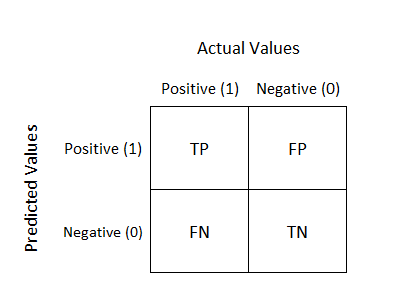

In [56]:
#Creating a confusion matrix
conf_matrix = confusion_matrix(y_test,y_preds)
conf_matrix

array([[952, 100],
       [160, 195]], dtype=int64)

True Positives = 952

Fasle Positives = 100

True Negative = 195

False Negatives = 160

In [57]:
#Printing Classification Report
print(classification_report(y_test,y_preds))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      1052
           1       0.66      0.55      0.60       355

    accuracy                           0.82      1407
   macro avg       0.76      0.73      0.74      1407
weighted avg       0.81      0.82      0.81      1407



## Thanks for reading.